# Step 1

In [581]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [559]:
# read in data
df = pd.read_excel('House_Iowa.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2

In [560]:
# creating numerical and categorical labels
labels = df.columns
df_num = df.select_dtypes(include=[np.number])
df_num = df_num.drop(['Id'], axis=1)
num_labels = df_num.columns

df_cat = df.select_dtypes(include=[object])
cat_labels = df_cat.columns

# creating lists for each column
missing_count = []
missing_percent = []
skewness = []
mean = []
median = []
minimum = []
maximum = []
cardinality = []
missing_percent_cat = []

In [561]:
# find desired table values
for label in num_labels:
    missing_count.append(df[label].isnull().sum())
    missing_percent.append(df[label].isnull().sum()/len(df[label]))
    skewness.append(df[label].skew())
    mean.append(df[label].mean())
    median.append(df[label].median())
    minimum.append(df[label].min())
    maximum.append(df[label].max())
    
for label in cat_labels:
    cardinality.append(len(df[label].unique()))
    missing_percent_cat.append(df[label].isnull().sum()/len(df[label]))

In [562]:
# creating tables    
table1 = pd.DataFrame({'Missing Count': missing_count, 'Missing Percent': missing_percent, 'Skewness': skewness, 'Mean': mean, 'Median': median, 'Minimum': minimum, 'Maximum': maximum}, index=num_labels)
table2 = pd.DataFrame({'Cardinality': cardinality, 'Missing Percent': missing_percent_cat}, index=cat_labels)

### A

In [563]:
# swapping axes to desired 
table1.swapaxes("index", "columns") 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Missing Count,0.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Missing Percent,0.000000,0.177397,0.000000,0.000000,0.000000,0.000000,0.000000,0.005479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skewness,1.407657,-0.816687,12.207688,0.216944,0.693067,-0.613461,-0.503562,2.669084,1.685503,4.255261,0.920268,1.524255,1.376757,0.813030,9.011341,1.366560,0.596067,4.103403,0.036562,0.675897,0.211790,4.488397,0.676341,0.649565,-0.649415,-0.342549,0.179981,1.541376,2.364342,3.089872,10.304342,4.122214,14.828374,24.476794,0.212053,0.096269,1.882876
Mean,56.897260,60.976686,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
Median,50.000000,65.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
Minimum,20.000000,10.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
Maximum,190.000000,99.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### B

In [564]:
table2.swapaxes("index", "columns") 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Cardinality,5.0,2.0,3.000000,4.0,4.0,2.0,5.0,3.0,25.0,9.0,8.0,5.0,8.0,6.0,8.0,15.0,16.0,5.000000,4.0,5.0,6.0,5.000000,5.000000,5.000000,7.000000,7.000000,6.0,5.0,2.0,6.000000,4.0,7.0,6.000000,7.000000,4.000000,6.000000,6.000000,3.0,4.000000,5.000000,5.000000,6.0,6.0
Missing Percent,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.026027,0.0,0.0,0.0,0.000685,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.055479,0.0,0.995205,0.807534,0.963014,0.0,0.0


# Step 3

### A

In [565]:
# create missing value indicator columns
for label in num_labels:
    df[label + '_missing'] = df[label].isnull().astype(int)

for label in cat_labels:
    df[label + '_missing'] = df[label].isnull().astype(int)

In [579]:
df.head()

,Id,OverallQual,FullBath,BedroomAbvGr,GarageCars,GarageArea,MoSold,YrSold,SalePrice,MSSubClass_missing,LotFrontage_missing,LotArea_missing,OverallQual_missing,OverallCond_missing,YearBuilt_missing,YearRemodAdd_missing,MasVnrArea_missing,BsmtFinSF1_missing,BsmtFinSF2_missing,BsmtUnfSF_missing,TotalBsmtSF_missing,_1stFlrSF_missing,_2ndFlrSF_missing,LowQualFinSF_missing,GrLivArea_missing,BsmtFullBath_missing,BsmtHalfBath_missing,FullBath_missing,HalfBath_missing,BedroomAbvGr_missing,KitchenAbvGr_missing,TotRmsAbvGrd_missing,Fireplaces_missing,GarageYrBlt_missing,GarageCars_missing,GarageArea_missing,WoodDeckSF_missing,OpenPorchSF_missing,EnclosedPorch_missing,_3SsnPorch_missing,ScreenPorch_missing,PoolArea_missing,MiscVal_missing,MoSold_missing,YrSold_missing,SalePrice_missing,MSZoning_missing,Street_missing,Alley_missing,LotShape_missing,LandContour_missing,Utilities_missing,LotConfig_missing,LandSlope_missing,Neighborhood_missing,Condition1_missing,Condition2_missing,BldgType_missing,HouseStyle_missing,RoofStyle_missing,RoofMatl_missing,Exterior1st_missing,Exterior2nd_missing,MasVnrType_missing,ExterQual_missing,ExterCond_missing,Foundation_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,Heating_missing,HeatingQC_missing,CentralAir_missing,Electrical_missing,KitchenQual_missing,Functional_missing,FireplaceQu_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,PavedDrive_missing,PoolQC_missing,Fence_missing,MiscFeature_missing,SaleType_missing,SaleCondition_missing,MSSubClass_transformed,LotFrontage_transformed,LotArea_transformed,OverallCond_transformed,YearBuilt_transformed,YearRemodAdd_transformed,MasVnrArea_transformed,BsmtFinSF1_transformed,BsmtFinSF2_transformed,BsmtUnfSF_transformed,TotalBsmtSF_transformed,_1stFlrSF_transformed,_2ndFlrSF_transformed,LowQualFinSF_transformed,GrLivArea_transformed,BsmtFullBath_transformed,BsmtHalfBath_transformed,HalfBath_transformed,KitchenAbvGr_transformed,TotRmsAbvGrd_transformed,Fireplaces_transformed,GarageYrBlt_transformed,WoodDeckSF_transformed,OpenPorchSF_transformed,EnclosedPorch_transformed,_3SsnPorch_transformed,ScreenPorch_transformed,PoolArea_transformed,MiscVal_transformed,SalePrice_transformed,Neighborhood_smoothed,Exterior1st_smoothed,Exterior2nd_smoothed,BsmtFinType1_smoothed,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Other,LotShape_Reg,LandContour_HLS,LandContour_Lvl,LandContour_Other,Utilities_Other,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Condition1_Norm,Condition1_Other,Condition2_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,MasVnrType_None,MasVnrType_Other,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,ExterCond_Other,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtCond_Other,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Other,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,CentralAir_Y,Electrical_Other,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Other,KitchenQual_TA,Functional_Typ,PavedDrive_Other,PavedDrive_Y,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,7.0,2.0,3.0,2.0,548.0,2.0,2008.0,208500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,4.110874,4225.0,9.042040,1.791759,4012009.0,4012009.0,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,0.693147,0.693147,2.197225,0.000000,4012009.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,12.247699,3.150568e+06,1.118869e+07,1.098883e+07,1.002164e+07,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

### B

In [566]:
# fill all num
imputer = SimpleImputer(strategy='mean')
df[num_labels] = imputer.fit_transform(df[num_labels])

In [567]:
df[num_labels]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1950.0,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


### C

In [568]:
# selecting skewed columns
skew_labels = []
pos_skew_labels = []
neg_skew_labels = []
for label in num_labels:
    if "_missing" in label:
        continue 
    if df[label].skew() > 0.5 or df[label].skew() < -0.5:
        skew_labels.append(label)
        if df[label].skew() > 0.5:
            pos_skew_labels.append(label)
        else:
            neg_skew_labels.append(label)

In [569]:
# transform skewed columns
for label in num_labels:
    if label in pos_skew_labels:
        df[label + "_transformed"] = np.log1p(df[label])
    elif label in neg_skew_labels:
        df[label + "_transformed"] = np.power(df[label], 2)

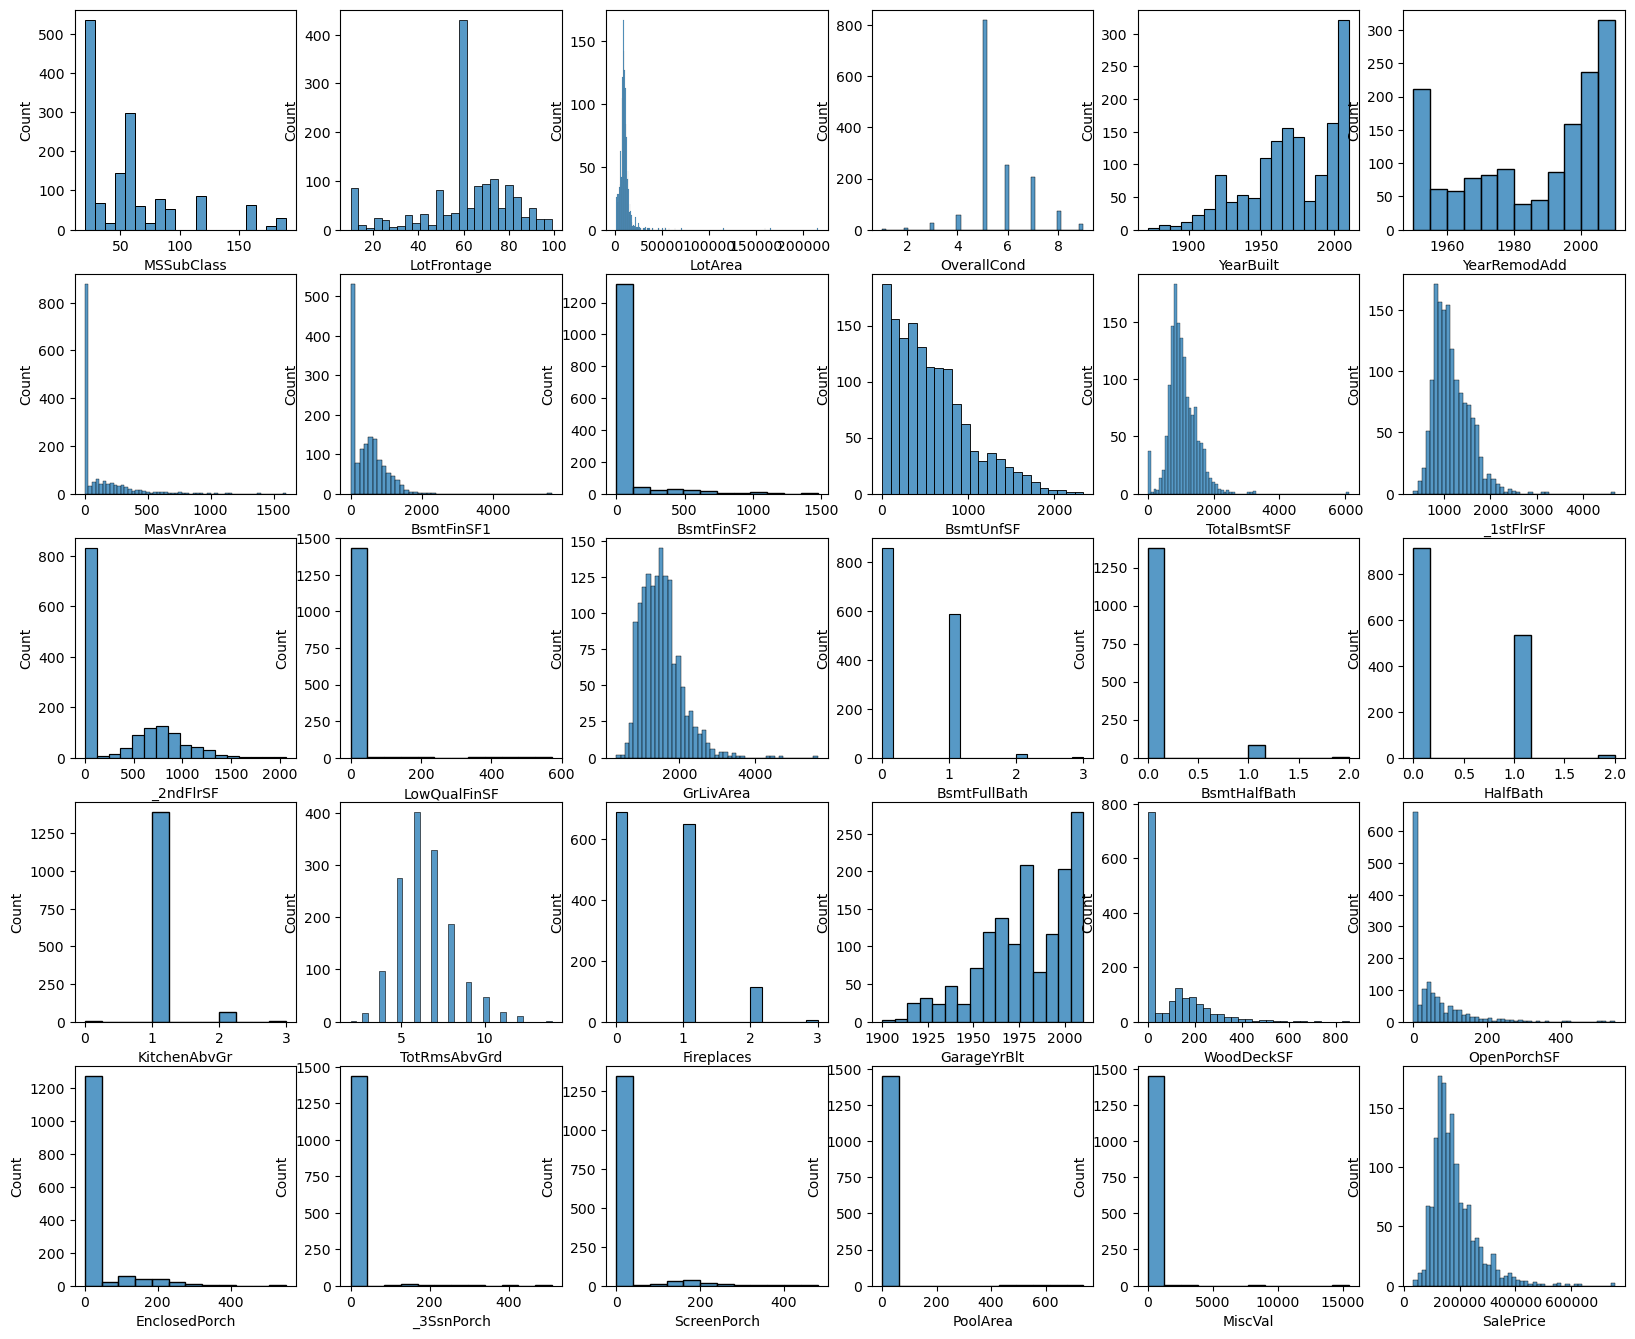

In [570]:
# analyze skew transformation
fig = plt.figure(figsize=(20, 20))
for i in range(len(skew_labels)):
    ax = fig.add_subplot(6, 6, i+1)
    sns.histplot(df[skew_labels[i]], ax=ax)

In [571]:
# produce before and after skewness tables
print("\nVariable Name", "\t  Skewness Before", "\t    Skewness After")
for label in skew_labels:
    print(label, "\t", df[label].skew(), "\t", df[label + "_transformed"].skew())


Variable Name 	  Skewness Before 	    Skewness After
MSSubClass 	 1.4076567471495591 	 0.2489971096100625
LotFrontage 	 -0.9002521773880381 	 0.1660528247753833
LotArea 	 12.207687851233496 	 -0.13740448122837784
OverallCond 	 0.6930674724842182 	 -0.2540153892640734
YearBuilt 	 -0.613461172488183 	 -0.5862944208882047
YearRemodAdd 	 -0.5035620027004709 	 -0.4961324938963566
MasVnrArea 	 2.676411784729959 	 0.4811201270555158
BsmtFinSF1 	 1.685503071910789 	 -0.618409817855514
BsmtFinSF2 	 4.255261108933303 	 2.5236937641679753
BsmtUnfSF 	 0.9202684528039037 	 -2.1865035796982095
TotalBsmtSF 	 1.5242545490627664 	 -5.1546699835179135
_1stFlrSF 	 1.3767566220336365 	 0.08011408968181778
_2ndFlrSF 	 0.8130298163023265 	 0.28964345806359637
LowQualFinSF 	 9.011341288465387 	 7.460316514621369
GrLivArea 	 1.3665603560164552 	 -0.006140253486287281
BsmtFullBath 	 0.596066609663168 	 0.4192126338281104
BsmtHalfBath 	 4.103402697955168 	 3.9330635244650436
HalfBath 	 0.675897448233722 	 0.56

### D

In [572]:
# combine low frequency categories in each column
threshold = 50
for label in cat_labels:
    counts = df[label].value_counts(dropna=False)
    low_card = counts[counts < threshold].index.tolist()
    df[label] = df[label].apply(lambda x: 'Other' if x in low_card else x)

In [573]:
# selecting high cardinality columns
threshold = 6
high_card_labels = []
for label in cat_labels:
    if df[label].nunique() > threshold:
        high_card_labels.append(label)

In [574]:
# smoothing columns
smoothing_factor = 10
for label in high_card_labels:
    means = df.groupby(label)['SalePrice'].mean()
    counts = df.groupby(label)['SalePrice'].count() 
    smeans = (df['SalePrice'].mean() + (counts / smoothing_factor) * means ) / 1 + (counts + smoothing_factor)   
    df[label + "_smoothed"] = df[label].map(smeans)    

# Step 4

In [575]:
# prepare data for modeling by dropping altered columns
if 'SalePrice' in skew_labels:
    skew_labels.remove('SalePrice')
df.drop(skew_labels, axis=1, inplace=True) # from _transformed
df.drop(high_card_labels, axis=1, inplace=True) # from _smoothed
df.dropna(axis=1, inplace=True) # from _missing

In [576]:
# encoding remaining categorical columns
df = pd.get_dummies(df, drop_first=True, dtype=float)

In [577]:
# df to arrays
data = df.drop(['SalePrice'], axis=1).values
target = df['SalePrice'].values

# k-fold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# list subsets
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    X_train, x_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    print("Fold: ", fold + 1)
    print("Train indices: ", train_index)
    print("Test indices: ", test_index)

Fold:  1
Train indices:  [   0    1    2 ... 1457 1458 1459]
Test indices:  [  15   23   29   30   32   43   44   49   51   56   58   59   63   65
   67   70   76   78   81   99  101  107  111  115  123  128  141  163
  168  175  184  192  196  198  203  208  218  220  231  233  237  239
  240  244  247  259  261  270  271  274  275  277  289  297  306  309
  310  316  322  324  332  339  344  350  351  353  354  358  361  363
  365  367  371  374  382  394  398  411  413  415  416  422  423  425
  426  427  428  429  432  433  451  453  464  478  479  490  494  522
  526  528  529  532  535  538  543  554  558  567  571  575  576  581
  584  585  588  589  590  591  597  598  599  602  607  614  619  620
  628  634  636  643  649  651  669  670  672  674  677  679  680  682
  691  693  695  707  711  718  720  722  733  736  744  746  754  755
  765  772  774  777  781  782  788  796  802  806  811  812  817  836
  838  843  846  855  865  874  881  887  892  894  898  906  907  910
 

# Step 5

In [589]:
# setting up model
model = Lasso(alpha=0.5)
ensemble = 0
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Fold: ", i)
    print("Train MSE:",mean_squared_error(y_train, y_train_pred))
    print("Test ASE:", mean_squared_error(y_test, y_test_pred))
    
    ensemble += mean_squared_error(y_test, y_test_pred)
    i += 1

c:\Users\Sern\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sern\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sern\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+11, tolerance: 

Fold:  1
Train MSE: 279957210.2315116
Test ASE: 630344624.6805023
Fold:  2
Train MSE: 301960140.82225007
Test ASE: 525104080.4214683
Fold:  3
Train MSE: 323810991.77858937
Test ASE: 454862015.5831138
Fold:  4
Train MSE: 326299264.9198287
Test ASE: 384193151.79863673
Fold:  5
Train MSE: 348787313.2843746
Test ASE: 315723369.617615


c:\Users\Sern\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+11, tolerance: 7.373e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sern\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+11, tolerance: 7.682e+08
  model = cd_fast.enet_coordinate_descent(


# Step 6

In [590]:
ensemble /= 5
ensemble

462045448.4202672